#  监督学习：什么是好的模型结果？ Cost Function

# 有时间再讨论 - imbalance 样本不均衡问题

1.连续变量的模型，如何来衡量模型结果？   
2.二分类问题   
* 假设经验，p-value
* confusion matrix
* 召回率，准确率
* F1-score
* ROC & AUC

3.多分类模型，如何衡量模型结果   
4.imbalance问题

**1.如何定义一个模型结果的好坏？**
* 比惨

**2.连续变量的模型，如何来衡量模型结果？**  
* 距离
* 残差
* sum of squares error:SSE 残差平方和   
$\sum(y_i - \widehat{y}_i)^2 = SSE$     
    * $y_i$是样本值   
    * $\widehat{y}_i$是拟合值
    * $\widehat{y}_i = \alpha + \beta x_i$,其中$\alpha$和$\beta$由最小二乘法求得
* sum of squares for regression: SSR 回归平方和   
$\sum(\widehat{y}_i - \overline{y})^2 = SSR$    
    * $\widehat{y}_i$是拟合值
    * $\overline{y}$是期望或平均值值
* total sum of squares: SST 总偏差平方和   
$\sum(y_i - \overline{y})^2 = SST$   

$ SST = SSE + SSR $   
*$R^2$是什么？*
* 样本的总偏差平方和中，被回归平方和解释的百分比   
* $R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST} $

**3.二分类问题**   
1.假设检验   
https://support.minitab.com/zh-cn/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/what-is-a-hypothesis-test/   
https://wiki.mbalib.com/wiki/%E5%81%87%E8%AE%BE%E6%A3%80%E9%AA%8C   
2.原假设，事件，事件的概率分布   
3.p-value：在原假设成立时，出现观测值以及更极端情况的概率   
https://www.jianshu.com/p/4c9b49878f3d   
4.备择假设   
5.Threshold分类阈值   
6.设立分类阈值的结果：第一类错误(假阳性)：弃真，第二类错误：存伪   
7.定义阈值的分类效果：显著性水平α   
8.α，β，1 - β，or power 
   * α- 第一类错误(false positive)
   * β- 第二类错误(false negative)
   * power = 1 - β   

9.ROC曲线以及其性质：0.横纵坐标( false positive,true positive )， 1.一般来说面积>0.5, 2.斜率为正   
   * 曲线单调增加   
   * 每个点都在45°线上方
   * 曲线下方的面积就是AUC( area under curve )

10.什么样的ROC曲线更好?   
   * 这条曲线离45°线越远，表示分类效果越好   

11.ROC曲线历史   
12.confusion matrix：弃真存伪

| null |识别结果：喝了酒(Positive)|识别结果：没喝酒(Negative) |   
| :------------:|:--------------:|:------------: |   
| 实际：喝酒了(Positive)|True Positive|False Negative |   
| 实际：没喝酒(Negative)|False Positive|True Negative |   
    
    目标：抓酒驾
    测试仪若显示浓度超标：Positve，阳性
    测试仪若显示浓度正常：Negative,阴性   
    
13.召回率(Recall)，准确率(Precision)
   * 召回率高，准确率就低，反之亦然。   
   
https://www.jiqizhixin.com/articles/2019-03-07-12   
14.F1 score   
$F1 score = \frac{\frac{1}{Recall} + \frac{1}{Precision}}{2}$

*计算F1_Score*

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from sklearn.metrics import f1_score
y_true = [0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0]
y_pred = [0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1]
f1_score(y_true,y_pred)

0.47058823529411764

In [9]:
f1_score?

In [14]:
from sklearn.metrics import precision_score,recall_score

In [15]:
precision_score(y_true,y_pred)

0.4444444444444444

In [17]:
recall_score(y_true,y_pred)

0.5

In [18]:
y_true = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0]
y_pred = [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,0]

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accu = accuracy_score(y_true,y_pred)
prec = precision_score(y_true,y_pred)
reca = recall_score(y_true,y_pred)
F1_score = f1_score(y_true,y_pred)
print('accuracy = %f, \n \
precision = %f, \n \
recall = %f, \n \
F1_score = %f'%(accu, prec, reca, F1_score))

accuracy = 0.720000, 
 precision = 0.166667, 
 recall = 0.333333, 
 F1_score = 0.222222


*练习计算与画ROC*
1. 生成原始数据
2. 使用模型进行分类
3. 用ROC进行效果衡量

In [21]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
# 这个cross_validatio这个包早就不在使用了，划分到了model_selection这个包中

X,y = make_classification(n_samples=10000,n_features=10,n_classes=2,n_informative=5)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [27]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=10000,n_features=10,n_classes=2,n_informative=5)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
from sklearn.metrics import roc_auc_score,roc_curve

preds = clf.predict_proba(X_test)[:,1]
fpr,tpr,_ = roc_curve(y_test,preds)

df = pd.DataFrame(dict(fpr=fpr,tpr=tpr))

In [33]:
df.head()

,fpr,tpr
0,0.000000,0.000000
1,0.000000,0.000992
2,0.001008,0.000992
3,0.001008,0.010913
4,0.002016,0.010913


In [34]:
roc_auc = roc_auc_score(y_test,preds)

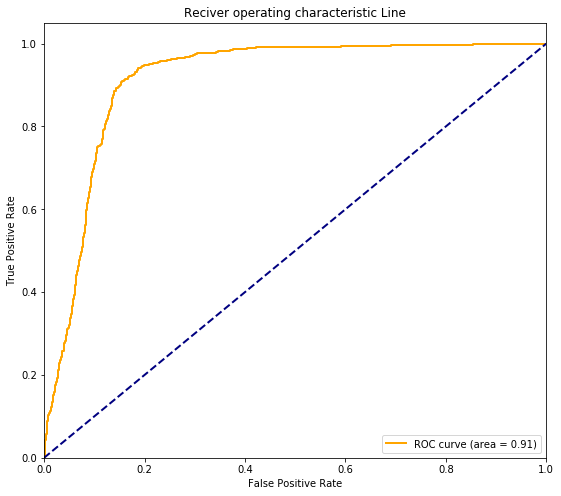

In [56]:
plt.figure(figsize=[9,8])
lw =2
plt.plot(fpr,tpr,color='orange',
         lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciver operating characteristic Line')
plt.legend(loc='lower right')
plt.show()

**4.多分类模型，如何衡量模型结果?**   
* 直观上不容易像连续变量一样定义每一个预测值离观测值的距离(欧几里得距离)
* 多分类时，用cross-entropy来衡量分类的结果

* 借鉴信息熵
$-\sum_{i}^Kp(y_i)logp(y_i)$   
    * 将信息(在这里的信息是一个概率分布)编码，所需的最小平均bits长度

* 信息熵的特点：
    * 衡量混乱程度，信息熵越大，越混乱
    * 什么叫混乱?   
        。p(positive)=0,p(negative)=1   
        。p(positive)=0.5,p(negative)=0.5

* 在分类问题中(classification)
    * 观测到的每个样本可以属于多种(K个)类别，$ y_i , i = 1,2,3,...K$
    * 用模型预测出来的每一个类别，出现的概率，$q(\widehat{y}_i)$

* cross-entropy
    * cross_entropy = $-\frac{1}{n}(\sum_{i}^n I(y_i==1)logq(\widehat{y}_i=1)+ ...+ I(y_i==K)logq(\widehat{y}_i=K))$
    * n为样本量，I是指示函数，当$y_i=k$为真时，$I(y_i==K)$值为1

* 二分类时
    * cross_entropy = $-\frac{1}{n}(\sum_{i}^n I(y_i=0)logq(\widehat{y}_i=0)+ I(y_i=1)logq(\widehat{y}_i=1))$
    * 再简化一点，cross_entropy = $-\frac{1}{n}(\sum_{i}^n y_ilog\widehat{q}_i+ (1-y_i)log(1- \widehat{q}_i))$
  

* 一个案例来算一算二分类的cross_entropy

In [2]:
import numpy as np
A =np.array([0,0,1,1,1,0,0,0,0,1,0,1])
q =np.array([0.1,0.2,0.8,0.9,0.7,0.1,0.1,0.2,0.3,0.9,0.6,0.5])
n = len(A)

In [9]:
cross_entropy = -1/n*(np.sum(A*np.log(q))+ np.sum((1-A)*np.log(1-q)))
print('cross_entropy = ',cross_entropy)
#print('cross_entropy = %f'%cross_entropy)

cross_entropy =  0.2932517527119438


* 讲logistic regression时，要从maximum-likelihood推出cross_entropy

**5.imbalanced问题**   
* imbalance data就是指正负样本数量相差太大，一类占10%甚至1%以下，另一类占绝大多数，这对机器学习算法是个现实的挑战
* 用什么样的衡量方式？不能光看accuracy
* 1000个样本，大多数(980)都属于负样本，正样本只有20个，算法容易被负样本带偏
* 传统方法(决策树，逻辑回归)倾向于预测样本量大的类别，小样本就被认为是**噪音**，被忽略了

* 但有很多问题的正样本数量就是很少
    * 金融领域，个人信贷违约
    * 订阅服务的客服流失(custom churn rate):对于中国电信，NetFlix，Hulu这样的公司，准确预测客户流失特别重要
    * 罕见疾病

**如何应对imbalance datasets?**
1. 使用合适的衡量方式
    * F1   
2. 重新采样(resampling)
    * random under-sampling
        * 原有分布：负样本980，正样本20
        * under-sampling后：负样本98，正样本20
        * 优点：
            。提升运算效率，减少运算时间
        * 缺点：
            。有可能丢失重要的信息
            。对总体的估计可能是有偏差的
    * random over-sampling
        * 原有分布：负样本980，正样本20
        * over-sampling后：负样本980，正样本500
        * 优点：
            。保留所有有用信息
        * 缺点：
            。有可能overfiting，过拟合
    * 基于cluster的重新采样(先用聚类方法找出子类)
        * 原有分布：负样本3类：每类数量 200，400，380，正样本2类：每类数量 13，7
        * 重新采样后：负样本3类：每类数量 300，300，300，正样本2类：每类数量 150，150
        * 优点：
            。既解决不同类的样本不均等，又解决同类中子类间的样本不均等
        * 缺点：
            。有可能过拟合
    * 合成数据 SMOTE
        * 原有分布：负样本980，正样本20
        * 合成数据后：负样本980，正样本500(非重复采样，而是生成正样本数量(插值法))
        ![合成数据SMOTE](./合成数据SMOTE.png) 
        * 优点：
            。保留负样本所有信息
            。减缓过拟合
        * 缺点：
            。SMOTE生成的数据可能引入更多的噪音
            。对高维度的数据效果不好
3. 集成算法


**安装imbalanced-learn**   
* pip install -U imbalanced-learn